In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [32]:
train_data = pd.read_csv('Q4_train.csv')
train_data = train_data.iloc[:,1:]
test_data = pd.read_csv('Q4_test.csv')
test_data = test_data.iloc[:,1:]

x_train = np.array(train_data.iloc[:,0:-1])
y_train = np.array(train_data.iloc[:,-1:])
x_test = np.array(test_data.iloc[:,0:-1])
y_test = np.array(test_data.iloc[:,-1:])

In [33]:
def total_loss(X, y, Z, models):
    '''
    computes total loss achieved on X, y based on linear regressions stored in models, and partitioning Z
    
    :param X: design matrix, n x p (np.array shape (n,p))
    :param y: response vector, n x 1 (np.array shape (n,1) or (n,))
    :param Z: assignment vector, n x 1 (assigns each sample to a partition)
    :param models: a list of M sklearn LinearRegression models, one for each of the partitions
    
    :returns: the loss of your complete model as computed in (a)
    '''

    loss = 0             
    M = len(models)
    n = len(Z)
    
    for m in range(0, M):
        
        data_x_m = []
        data_y_m = []
        for i in range(n):
            if (Z[i] == m):
                data_x_m.append(X[i])
                data_y_m.append(y[i]) 
        
        if (len(data_x_m) > 0):
            y_pre = models[m].predict(data_x_m)

            one_loss = 0
            for i in range(len(y_pre)):
                if (Z[i] == m):
                    one_loss += (y_pre[i] - data_y_m[i])**2
            loss += one_loss

    return loss

In [34]:
def find_partitions(X, y, models):
    '''
    given M models, assigns points in X to one of the M partitions
    
    :param X: design matrix, n x p (np.array shape (n,p))
    :param y: response vector, n x 1 (np.array shape (n,1) or (n,))
    :param models: a list of M sklearn LinearRegression models for each 
    of the partitions
    
    :returns: Z, a np.array of shape (n,) assigning each of the points in X to one of M partitions
    '''
    M = len(models)
    n = len(y)
    Z = []
    for i in range(n):
        
        min_predict_y = 9999999
        target_m = 0
        for m in range(M):
            pred_y = models[m].predict([X[i]])
            
            if (pred_y - y[i])**2 < (min_predict_y - y[i])**2:
                min_predict_y = pred_y
                target_m = m
        Z.append(target_m)
    return np.array(Z)

def get_new_models(x, y, z, models):
    M = len(models)
    n = len(y)
    for m in range(M):
        data_x_m = []
        data_y_m = []
        for i in range(n):
            if (Z[i] == m):
                data_x_m.append(x[i])
                data_y_m.append(y[i])
        if (len(data_x_m) > 0):
            models[m] = LinearRegression().fit(data_x_m, data_y_m)
    return models

In [40]:
n = 400

train_losses = []
test_losses = []
for m in range(1, 31):
    Z = np.array([i % m for i in range(n)])
    models = [LinearRegression().fit(x_train, y_train) for i in range(m)]
    models = get_new_models(x_train, y_train, Z, models)
    loss = total_loss(x_train, y_train, Z, models)
    loss_before = loss 
    
    while (loss_before > loss):
        Z = find_partitions(x_train, y_train, models)
        models = get_new_models(x_train, y_train, Z, models)
        loss_before = loss
        loss = total_loss(x_train, y_train, Z, models)
        
    train_losses.append(loss)
    Z_test = find_partitions(x_test, y_test, models)
    test_losses.append(total_loss(x_test, y_test, Z_test, models)[0])
    print("M is equal to: ", m)
    print("loss train is: ", train_losses[-1])
    print("loss test is: ", test_losses[-1])

M is equal to:  1
loss train is:  [298.32817816]
loss test is:  54.36793387278779
M is equal to:  2
loss train is:  [176.69957095]
loss test is:  25.149044967463006
M is equal to:  3
loss train is:  [89.77343283]
loss test is:  17.95003525179927
M is equal to:  4
loss train is:  [73.8330994]
loss test is:  7.437899029799481
M is equal to:  5
loss train is:  [61.86355743]
loss test is:  4.917106440992632
M is equal to:  6
loss train is:  [59.70193421]
loss test is:  5.608549646727435
M is equal to:  7
loss train is:  [34.95285901]
loss test is:  6.643118615151242
M is equal to:  8
loss train is:  [23.97012746]
loss test is:  2.4844619304679076
M is equal to:  9
loss train is:  [39.59660404]
loss test is:  1.157546061352266
M is equal to:  10
loss train is:  [19.21842497]
loss test is:  0.39658160784827345
M is equal to:  11
loss train is:  [26.85907366]
loss test is:  0.07652957899034646
M is equal to:  12
loss train is:  [26.67044366]
loss test is:  0.4785956041049954
M is equal to:  1

<function matplotlib.pyplot.show(close=None, block=None)>

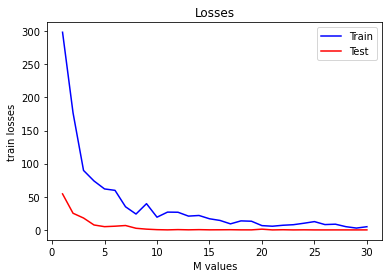

In [36]:
ax = plt.gca()
ax.plot(range(1,31), train_losses, color='b', label='Train')
ax.plot(range(1,31), test_losses, color='r', label='Test')
ax.legend()
plt.xlabel("M values")
plt.ylabel("train losses")
plt.title('Losses')
plt.show